In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

#### Exercise 04

Metropolis simulation of the 4d scalar phi^4 theory.

A c++ code to simulate the model is available in the folder 'code', and the data from which these plots are made are in 'code/results'

For small lambda we expect to be close to the free theory:
- Below kappa_c = 1/8 the field strength is approximately zero
- Above kappa_c it is non zero and increasing with kappa

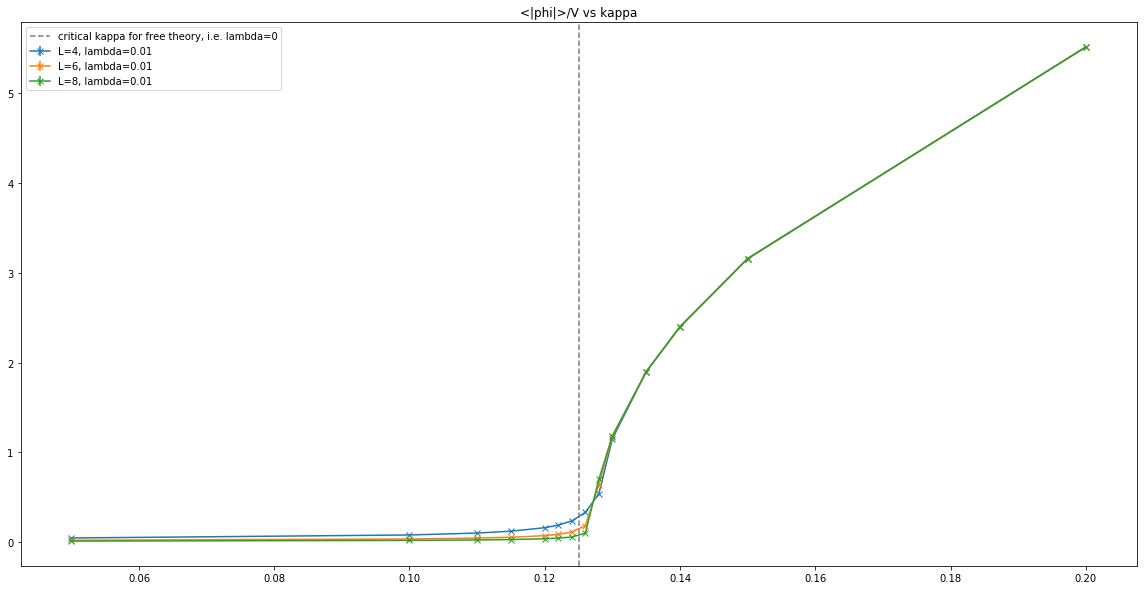

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (20,10)
plt.figure()
for L in [4, 6, 8]:
    dat = np.loadtxt("code/results/L"+str(L)+"_lambda0.01.txt")
    plt.errorbar(dat[:,0],dat[:,5], yerr=dat[:,6], marker='x', label="L="+str(L)+", lambda=0.01")
plt.axvline(x=1.0/8.0, label="critical kappa for free theory, i.e. lambda=0", linestyle='--', color="grey")
plt.title("<|phi|>/V vs kappa")
plt.legend()
plt.show()

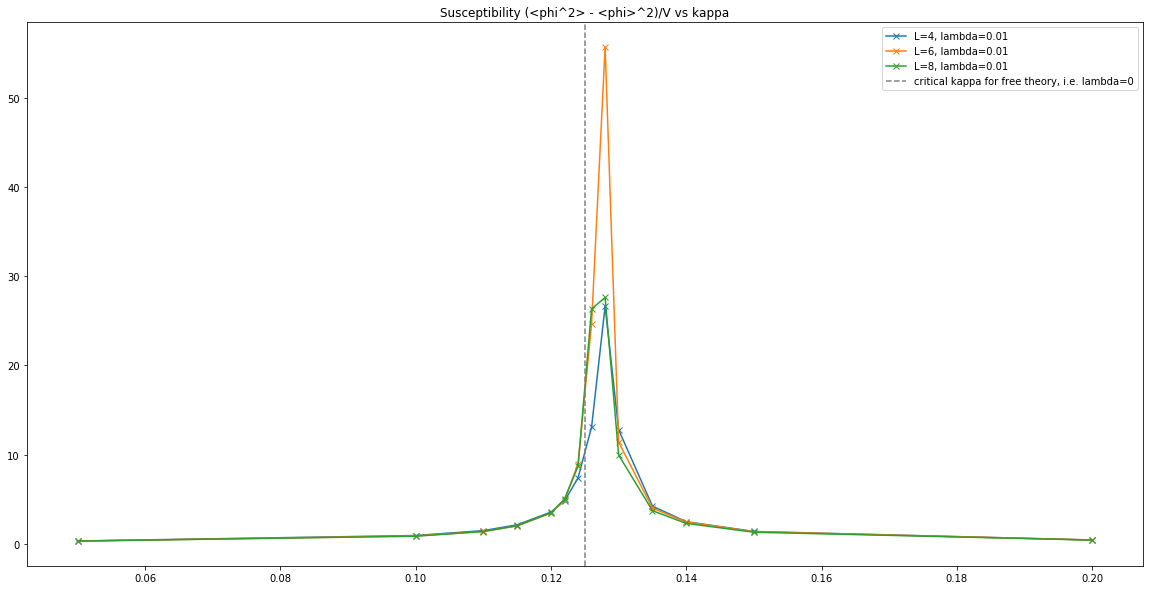

In [3]:
plt.figure()
for L in [4, 6, 8]:
    dat = np.loadtxt("code/results/L"+str(L)+"_lambda0.01.txt")
    vol = np.power(L, 4)
    plt.plot(dat[:,0],(dat[:,7]-dat[:,5]*dat[:,5])*vol, marker='x', label="L="+str(L)+", lambda=0.01")
plt.axvline(x=1.0/8.0, label="critical kappa for free theory, i.e. lambda=0", linestyle='--', color="grey")
plt.title("Susceptibility (<phi^2> - <phi>^2)/V vs kappa")
plt.legend()
plt.show()

In the limit lambda -> infinity we recover the Ising model,
where lambda becomes a Lagrange multiplier enforcing the condition phi^2 = 1, i.e. phi = +/-1
and where kappa_critical == beta^{ising}_critical / 2

In the following plots, as lambda is increased we see the peak in the susceptibility 
shift towards the kappa_critical corresponding to the ising limit,
and the field strength, or magnetisation, becomes bounded between zero and 1.

Technical note: at large lambda only metropolis updates that propose a phi close to either +1 or -1 will
have any chance of being accepted - so make sure the delta in the metropolis update is large enough that
it is possible to go from phi = -1 to phi = +1 in a single metropolis update.

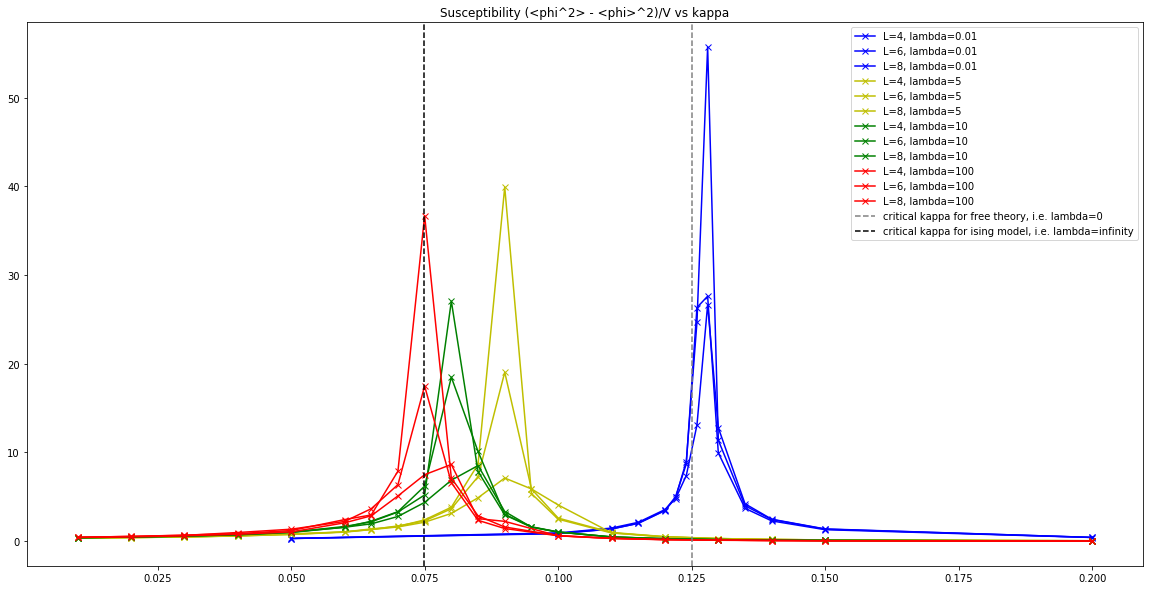

In [4]:
plt.figure()
colours = ['k','b','y','g','r','k']
c_index = 0
for l in [0.01, 5, 10, 100]:
    c_index += 1
    for L in [4, 6, 8]:
        dat = np.loadtxt("code/results/L"+str(L)+"_lambda"+str(l)+".txt")
        vol = np.power(L, 4)
        plt.plot(dat[:,0],(dat[:,7]-dat[:,5]*dat[:,5])*vol, marker="x", label="L="+str(L)+", lambda="+str(l), color=colours[c_index])
plt.axvline(x=1.0/8.0, label="critical kappa for free theory, i.e. lambda=0", linestyle='--', color="grey")
plt.axvline(x=0.1496947/2.0, label="critical kappa for ising model, i.e. lambda=infinity", linestyle='--', color="black")
plt.title("Susceptibility (<phi^2> - <phi>^2)/V vs kappa")
plt.legend()
plt.show()

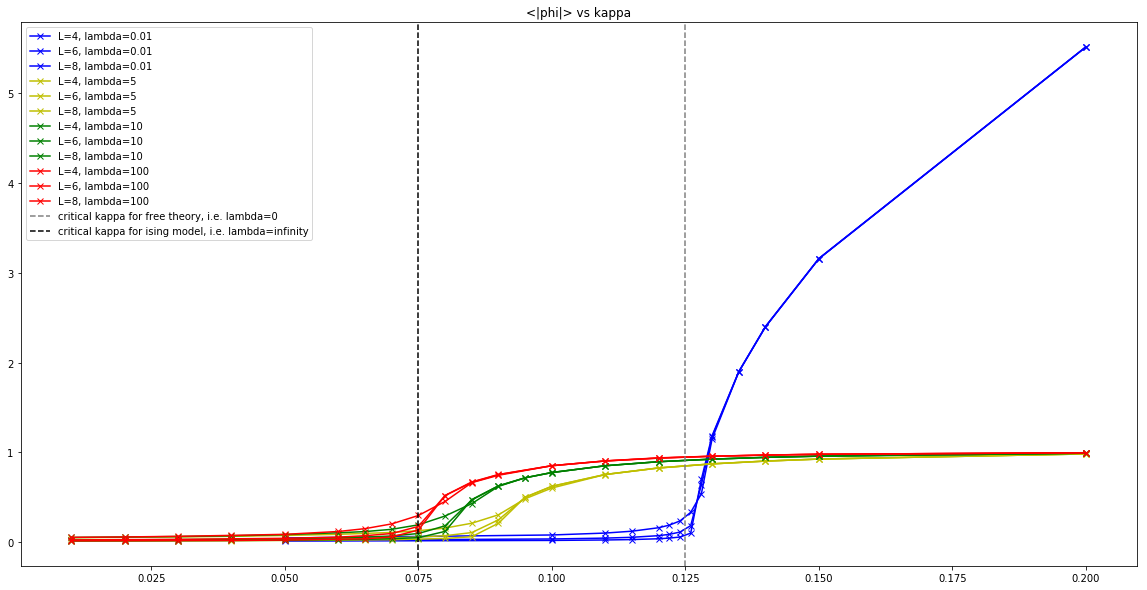

In [5]:
plt.figure()
colours = ['k','b','y','g','r','k']
c_index = 0
for l in [0.01, 5, 10, 100]:
    c_index += 1
    for L in [4, 6, 8]:
        dat = np.loadtxt("code/results/L"+str(L)+"_lambda"+str(l)+".txt")
        vol = np.power(L, 4)
        plt.plot(dat[:,0],dat[:,5], marker="x", label="L="+str(L)+", lambda="+str(l), color=colours[c_index])
plt.axvline(x=1.0/8.0, label="critical kappa for free theory, i.e. lambda=0", linestyle='--', color="grey")
plt.axvline(x=0.1496947/2.0, label="critical kappa for ising model, i.e. lambda=infinity", linestyle='--', color="black")
plt.title("<|phi|> vs kappa")
plt.legend()
plt.show()